In [33]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#changed at 12:23
from src.scheduler.booth_data_loader import load_booth_schedule
from src.scheduler.booth_allocator import allocate_booths
from src.scheduler.validate_assignment import validate_schedule
from src.scheduler.output_formatter import print_schedule_table, plot_assignment_distribution
from src.scheduler.booth_allocator import allocate_booths_optimized
import warnings
from matplotlib import font_manager
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'  # 适配 Linux
my_font = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = [my_font.get_name()]

In [34]:
booth_schedule = load_booth_schedule("../../data/booth_schedule.json")
enterprise_df = pd.read_csv("../../data/selected_enterprises.csv")

In [35]:
enterprise_df['需求小时数'] = (enterprise_df['需求小时数'] * 1.10).round(2)

In [36]:
assignment = allocate_booths_optimized(booth_schedule, enterprise_df)

In [37]:
#validate_schedule(assignment, enterprise_df)

In [38]:
print("### 问题三：展位分配附表\n")
print_schedule_table(assignment)

### 问题三：展位分配附表

            A1                A2    B1          B2
周一  G x1, E x3        E x1, F x4  F x1  F x1, C x1
周二        C x4  C x1, D x2, B x2  B x1        B x2
周三        B x4              B x5  B x1  B x1, A x1
周四        A x4              A x5  A x1        A x2
周五        A x4              A x5  A x1        A x2


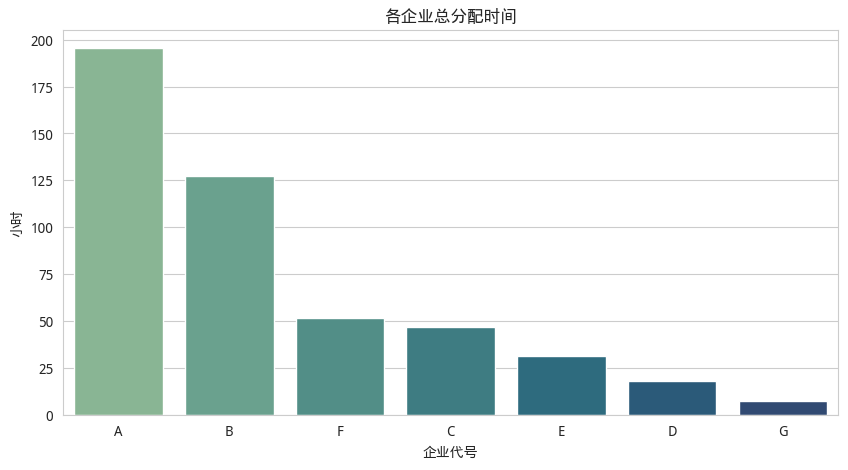

In [39]:
plot_assignment_distribution(assignment, enterprise_df)


## 问题三建模公式说明

设企业 $i$ 的需求为 $d_i$，容忍不足为 $g_i$，则可接受最小分配时间：

$$
\text{MinAssign}_i = d_i - g_i
$$

我们将 $d_i$ 统一调整为：

$$
\hat{d}_i = d_i \times (1 + 10\%) = 1.1 \times d_i
$$

之后调度满足：

$$
\sum_{t=1}^{T} x_{i,t} \geq \hat{d}_i - g_i
$$

其中 $x_{i,t}$ 表示在时间段 $t$ 分配给企业 $i$ 的展位小时数。